# 1.閒聊問答實作

In [3]:
'''
請匯入fuzzy套件，並嘗試判斷與下列語句的相似度:
  ['最近有什麼好看的電影','推薦不錯的電影','那些影片評價不錯', "高評價的電影", "很棒的影片"]
若相似分數 >= 70，則回覆:
  "最近當然要看鬼滅劇場版阿!"
'''
!pip3 install -U pip
!pip3 install fuzzychinese
!pip3 install sklearn
from fuzzychinese import FuzzyChineseMatch

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Using cached sklearn-0.0.tar.gz (1.1 kB)
     |████████████████████████████████| 7.3 MB 2.1 MB/s 
     |████████████████████████████████| 32.8 MB 3.9 MB/s 
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none

In [76]:
def ask_movie(query, analyzer='stroke'):
    test_dict = ['最近有什麼好看的電影', '推薦不錯的電影', '那些影片評價不錯', "高評價的電影", "很棒的影片"]
    fcm = FuzzyChineseMatch(ngram_range=(3, 3), analyzer=analyzer)
    fcm.fit(test_dict)
    fcm.transform([query])
    
    scores = fcm.get_similarity_score()
    # print(scores)
    
    if any([score >= 0.7 for arr in scores for score in arr]):
        return f"{query}？ 最近當然要看鬼滅劇場版阿!"
    else:
        return f"{query}？ 是什麼意思？"

In [80]:
print('==== stroke ====') # 最正常的分析方式
print(ask_movie('電影'))
print(ask_movie('電影推薦'))
print(ask_movie('影片推薦'))
print(ask_movie('好看的電影'))
print(ask_movie('好看電影'))
print(ask_movie('好看影片'))
print(ask_movie('很棒電影'))

==== stroke ====
電影？ 最近當然要看鬼滅劇場版阿!
電影推薦？ 最近當然要看鬼滅劇場版阿!
影片推薦？ 最近當然要看鬼滅劇場版阿!
好看的電影？ 最近當然要看鬼滅劇場版阿!
好看電影？ 是什麼意思？
好看影片？ 是什麼意思？
很棒電影？ 最近當然要看鬼滅劇場版阿!


In [82]:
print('==== char ====') # 相似度分數很嚴格，很難有比對成功
print(ask_movie('電影', 'char'))
print(ask_movie('電影推薦', 'char'))
print(ask_movie('影片推薦', 'char'))
print(ask_movie('好看的電影', 'char'))
print(ask_movie('好看電影', 'char'))
print(ask_movie('好看影片', 'char'))
print(ask_movie('很棒電影', 'char'))

==== char ====
電影？ 是什麼意思？
電影推薦？ 是什麼意思？
影片推薦？ 是什麼意思？
好看的電影？ 是什麼意思？
好看電影？ 是什麼意思？
好看影片？ 是什麼意思？
很棒電影？ 是什麼意思？


In [84]:
print('\n==== radical ====') # Unable to decompose character '麼'.
print(ask_movie('電影'), 'radical')
print(ask_movie('電影推薦', 'radical'))
# print(ask_movie('影片推薦', 'radical'))
# print(ask_movie('好看的電影', 'radical'))
# print(ask_movie('好看電影', 'radical'))
# print(ask_movie('好看影片', 'radical'))
# print(ask_movie('很棒電影', 'radical'))

Unable to decompose character '麼'.
Unable to decompose character '電'.
Unable to decompose character '薦'.
Unable to decompose character '錯'.
Unable to decompose character '電'.
Unable to decompose character '評'.
Unable to decompose character '價'.
Unable to decompose character '錯'.
Unable to decompose character '評'.
Unable to decompose character '價'.
Unable to decompose character '電'.
Unable to decompose character '電'.
Unable to decompose character '薦'.



==== radical ====
電影？ 最近當然要看鬼滅劇場版阿! radical
電影推薦？ 是什麼意思？


# 2.知識問答實作

In [108]:
'''
請嘗試使用 regular expression 取得 html 的右側資訊摘要 (president.png)
並將其作為人物百科的回覆，以解決目前 parsing 結果的不足 (error.png)
'''
import jieba
import jieba.posseg
import random
import urllib.parse
import requests, re
from bs4 import BeautifulSoup

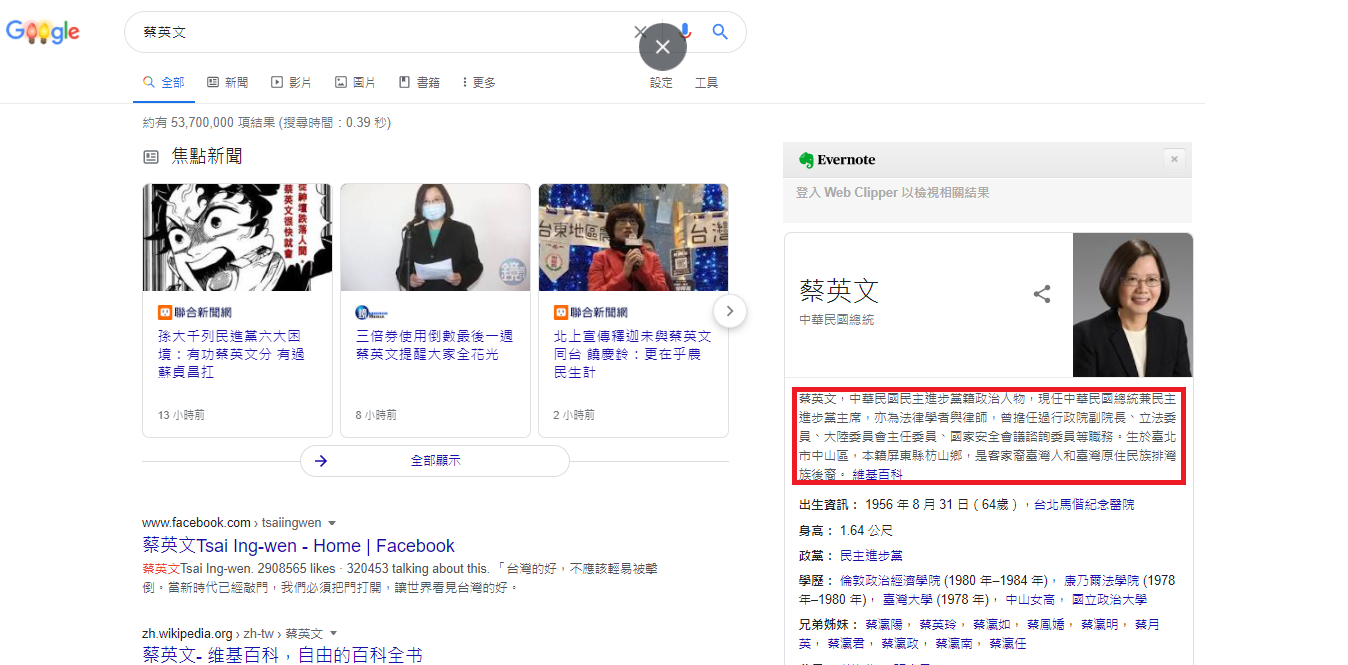

In [ ]:
from IPython.display import Image 
Image(filename='president.png') 

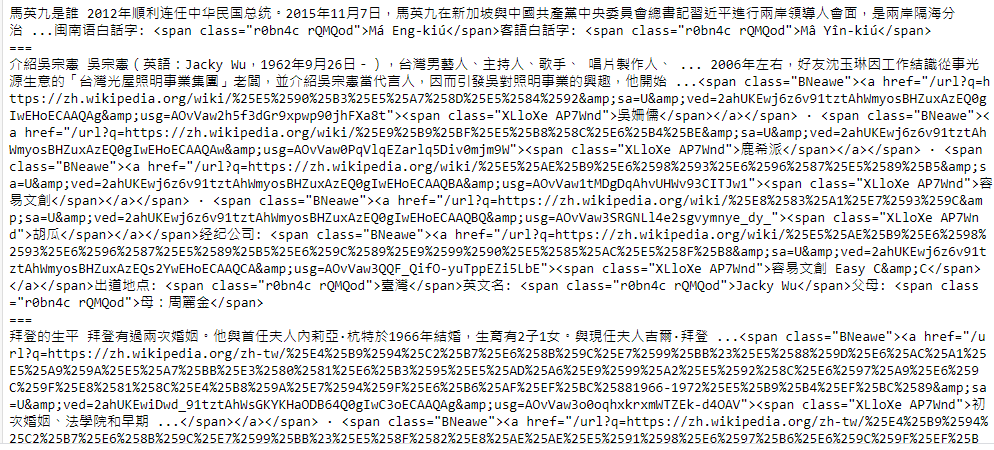

In [ ]:
from IPython.display import Image 
Image(filename='error.png') 

In [101]:
def get_html(query, num):
    query = urllib.parse.quote_plus(query)
    url = 'https://google.com/search?hl=zh-TW&q=' + query + "&num=" + str(num)
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'lxml')
        info = soup.find('div', {'class': 'BNeawe s3v9rd AP7Wnd'}).text
        return info
    except:
        return None

In [102]:
get_html('蔡英文', 1)

'蔡英文，中華民國民主進步黨籍政治人物，現任中華民國總統兼民主進步黨主席，亦為法律學者與律師，曾擔任過行政院副院長、立法委員、大陸委員會主任委員、國家安全會議諮詢委員等職務。生於臺北市中山區，本籍屏東縣枋山鄉，是客家人和臺灣原住民族排灣族之後裔。 維基百科'

In [103]:
get_html('馬英九', 1)

'馬英九，中華民國政治人物、學者，曾任第12、13任中華民國總統、第4、6任中國國民黨主席等職。祖籍江西省永新縣，籍貫湖南省衡山縣，馬鶴凌和秦厚修之子，生於英屬香港九龍油麻地，1952年隨雙親定居臺灣臺北市。\n畢業於國立臺灣大學法律學系，其後前往美國深造，獲紐約大學法學碩士學位、哈佛大學司法學博士學位。 維基百科'

In [104]:
get_html('吳宗憲', 1)

'吳宗憲，台灣男藝人、主持人、歌手、唱片製作人、演員、商人，出生於臺灣臺南市中西區。因參與電視歌唱比賽節目《五燈獎》而嶄露頭角，1987年以歌手身分出道，早年有「星馬王子」之名。 維基百科'

# 3.聊天機器人answer selection

In [111]:
'''
請嘗試加入"形容詞"及"副詞"的判斷，以優化"閒聊"與"知識"問答的分類效果
'''
def query_classifier(token):
    '''
    return
     True => samll talk
     False => encyclopedia
    '''
    count_nouns, count_verbs, count_advs, count_adjs = 0, 0, 0, 0

    token_len = len(token)
    for i, token in enumerate(token):
        word, pos = token

        if pos == "x": # 標點符號
            token_len -= 1
                      
        if any(pos == p for p in "n ng nr nrfg nrt ns nt nz".split(" ")): # 名詞類
            count_nouns += 1
        elif any(pos == p for p in "v vg vd vi vn vq".split(" ")): # 動詞類
            count_verbs += 1
        elif any(pos == p for p in "a ag ad an b i".split(" ")): # 形容詞類
            count_adjs += 1
        elif any(pos == p for p in "d dg df* t zg*".split(" ")): # 副詞類
            count_advs += 1

    # 若完全沒比對出名詞 可能為口語短句
    # 若形容詞超過兩個 可能為口語短句
    # 若副詞有出現 可能為口語短句
    if count_nouns == 0 or count_adjs >= 2 or count_advs > 0:
        return True
     # 若動詞超過兩個 可能為非口語短句
    elif count_verbs >= 2:
        return False
    else:
        return False

greating = "你是誰"
to_girl = [("請管好你的嘴","為什麼","因為我會隨時親你"),
           ("你單身多久了","一年多了","對不起，讓你等了這麼久"),
           ("我真的是太笨了","怎麼啦","除了喜歡你，其它什麼都做不好")]


def get_cutomize_ans(query):
    # 完全比對
    if query == greating:
        return "我是你的助理! 我可以陪你聊天喔~"

    # 部分比對
    elif "撩妹" in query:
        return str(random.choice(to_girl))

    # 模糊比對-1
    elif "台北" in query and "景點" in query:
        return "有101, 中正紀念堂還可以去爬象山喔!"
    
    elif any(i in query for i in "台北 台北市 台灣首都 天龍國".split()):
        if any(j in query for j in "手搖飲料店 珍奶店 飲料店".split()):
            url = "https://google.com/search?hl=zh-TW&q=台北市手搖飲料店&num=10"
            return url
        elif any(j in query for j in "名產 伴手禮 土產".split()):
            url = "https://google.com/search?hl=zh-TW&q=台北市名產&num=10"
            return url
        
        else:
            return None
            # return "我還沒辦法回覆你的問題喔!"
    else:
        return None
        # return "我還沒辦法回覆你的問題喔!"

def get_api_ans(query):
    URL = "http://api.qingyunke.com/api.php?key=free&appid=0&msg={}".format(query)
    headers = {'Content-Type': 'application/json'}
    res = requests.get(URL, headers=headers)
    return res.json()['content']

def get_html(query, num):
    query = urllib.parse.quote_plus(query)
    url = 'https://google.com/search?hl=zh-TW&q=' + query + "&num=" + str(num)
    try:
        response = requests.get(url)
        return BeautifulSoup(response.text, 'lxml')
    except:
        return None
    
# 取得搜尋結果的標題
def get_title(text):
    title = re.findall(r'<h3 class="zBAuLc"><div class="BNeawe vvjwJb AP7Wnd">(?P<content>.*?)</div></h3>', str(text), re.DOTALL)
    if title != []:
        title = title[0].replace('\n', '')
    return title

# 取得結果摘要
# def get_content(text):
#     content = re.findall(r'<div class="kCrYT"><div><div class="BNeawe s3v9rd AP7Wnd"><div><div><div class="BNeawe s3v9rd AP7Wnd">(?P<content>.*?)</div></div></div></div></div></div></div>', str(text), re.DOTALL)
#     if content != []:
#         content = content[0].replace('\n', '')
#         content = re.sub(u'<span class="r0bn4c rQMQod">.*?"r0bn4c rQMQod"> · </span>', "", content)
#     return content

def get_encyclopedia_ans(query):
    token = jieba_tokenizer(query)
    html = get_html(query, 1)
    info = html.find('div', {'class': 'BNeawe s3v9rd AP7Wnd'}).text

    # candidate = html.select('div.ZINbbc.xpd.O9g5cc.uUPGi')
    # answer = get_content(candidate)
    return info

def jieba_tokenizer(query):
    word_pos = jieba.posseg.cut(query)
    return [(word, pos) for word, pos in word_pos]

def get_response(query):
    token = jieba_tokenizer(query)
    res = query_classifier(token)
    
    cutomize_ans = get_cutomize_ans(query)
    # 先判斷是否為自定義語句
    if cutomize_ans != None:
        return cutomize_ans
    else:
        # 閒聊問句
        if res:
            return get_api_ans(query)
        # 知識問句
        else:
            return get_encyclopedia_ans(query)

In [112]:
queries = [
    "蔡英文是誰", 
    "介紹陳零九", 
    "柴可夫斯基的生平", 
    "蘋果為什麼會變紅", 
    "為什麼這群人是網紅霸主", 
    "熱氣球的原理",   
    
#     "馬英九是誰", 
#     "介紹吳宗憲", 
#     "拜登的生平", 
#     "含羞草的原理", 
#     "黑死病發生的時間", 
#     "海豚的智商",  
    
    "你不是已經在家了嗎",
    "重點是什麼呢", # @@
    "我最近睡不著",
    "你聽過鬼滅之刃嗎",  # @@
    "一起去玩啦",
    "風大雨大太陽大",
    "我好想吃冰喔",  # @@
    "呵呵，如果是這樣就沒救囉",
    "佛祖會生氣喔",  # @@
    "你會溜直排輪嗎",
    
#     "你是誰",
#     "撩妹金句",
#     "告訴我台北的知名景點有哪些",
#     "景點有哪些",
#     "台北市有幾間手搖飲料店",
#     "台北市有幾間搖手店",
#     "天龍國的伴手禮去哪裡買",
#     "天龍人的伴手禮"
]
import time
for query in queries:
    response = get_response(query)
    print("Q:", query)
    print("A:", response)
    print("===")
    time.sleep(5)

Q: 蔡英文是誰
A: 蔡英文（排灣語：Tjuku；英語：Tsai Ing-Wen；1956年8月31日－），中華民國民主進步黨籍政治人物，現任中華民國總統兼民主進步黨主席，亦為法律學者與律師，曾擔任過 ...
蔡潔生 · 蔡英文學位門 · 福佬客[编辑] · 特殊的國與國關係[编辑]

副总统: 陳建仁（第14任）; 賴清德（第15任）
出生: 1956年8月31日（65歲）; 中華民國臺灣省臺北市中山區馬偕紀念醫院
居住地: 永和寓所
父母: 蔡潔生（父親）; 張金鳳（母親）
===
Q: 介紹陳零九
A: 陳零九，本名為陳志豪，出生於台灣高雄，台灣創作歌手、主持人。2009年起成為網路歌手，2013年起簽約滾石唱片，截至2021年8月31日已發行7張正規專輯和1張數位專輯。現為《娛樂百分百》主持人、雙人組合「九澤CP」及男子團體「五堅情」的成員。 維基百科
===
Q: 柴可夫斯基的生平
A: 彼得·伊利奇·柴可夫斯基，俄國浪漫樂派作曲家，其作品有民族樂派特徵，但仍以浪漫風格為基準。其風格直接和間接地影響了很多後來者。
柴可夫斯基出生於沃特金斯克一個貴族家庭，從小在母親的教導下學習鋼琴，由於父親的反對，進入法學院學習，畢業以後在法院工作。 維基百科
===
Q: 蘋果為什麼會變紅
A: 2015年3月3日 · 花青素含量與呈現出的顏色深淺呈正相關，花青素含量越高，顏色越深。像紅富士、紅星這些品種的蘋果含有花青素，在成熟季節時，要求光照時間充足，以保證 ...
===
Q: 為什麼這群人是網紅霸主
A: 2019年9月13日 · 知名Youtube 頻道「這群人」透過日常生活的搞笑短片爆紅，目前已擁有超過300 萬粉絲訂閱，除此之外，裡頭的成員更是擁有超高知名度，人氣完全不輸現代 ...
===
Q: 熱氣球的原理
A: 熱氣球並非真的被“駕駛”，它是隨風飛行。一般來說北半球，風向大致上會呈現由地面至高空以順時針方向偏轉（梯度力、科氏力、磨擦力交互 ...
===
Q: 你不是已經在家了嗎
A: 帥哥，又有錢
===
Q: 重點是什麼呢
A: 2019年8月31日 · 基本解释： 1、杠杆中承受重量的一点。 2、<名>同类事物中的重要的或主要的部分。 3、<名>重要的或主要的；有重点的。“侧重点”是什么意思？侧重点是什么意思zhidao.baidu.com 的其

* 依據詞性去判斷口語非口語的部分感覺很需要語言學的 domain knowledge 才能做到更佳的優化